## H0: Между группами с опп и без него нет разницы в соответствующем количественном факторе нет

In [2]:
import pandas as pd
from scipy.stats import ttest_ind, shapiro, mannwhitneyu
from utils.preformatting_data import preformat
from utils.graphics import *

data = preformat(pd.read_csv('../medics_1.csv', delimiter=',', encoding='utf-8'))

In [4]:
# разделение групп на опп и без него
with_opp = data[data['развитие_опп'] == 1]
without_opp = data[data['развитие_опп'] == 0]

for factor in ["сад", "дад", "чсс", "рн", "фракция_изгнания",
               "креатинин_крови", "скф_расч", "калий", "толщина_паренхимы_почек",
               "количество_шунтов", "длительность_аик", "длительность_операции", "время_пережатия_аорты",
               "объем_кровопотерии", "объем_гемотрансфузии", "объем_инфузий", "диурез", "возраст", "имт",
               "холестерин", "мочевина"]:

    if shapiro(with_opp[factor])[1] >= 0.05 and shapiro(without_opp[factor])[1] >= 0.05:
        _, p_value = ttest_ind(with_opp[factor], without_opp[factor], equal_var=False)
    else:
        _, p_value = mannwhitneyu(with_opp[factor], without_opp[factor])

    # выводим метрики
    print(f'P-value: {round(p_value, 4)}')

    if p_value < 0.05:
        print(f"Отвергаем нулевую гипотезу, различия между группами существуют в {factor}.")
    else:
        print(f"Не получилось отвергнуть нулевую гипотезу, различия между группами в {factor} не существенны.")
    print('--------------------------------------------------------------------------------------------------')

P-value: 0.3647
Не получилось отвергнуть нулевую гипотезу, различия между группами в сад не существенны.
--------------------------------------------------------------------------------------------------
P-value: 0.7096
Не получилось отвергнуть нулевую гипотезу, различия между группами в дад не существенны.
--------------------------------------------------------------------------------------------------
P-value: 0.0327
Отвергаем нулевую гипотезу, различия между группами существуют в чсс.
--------------------------------------------------------------------------------------------------
P-value: 0.1181
Не получилось отвергнуть нулевую гипотезу, различия между группами в рн не существенны.
--------------------------------------------------------------------------------------------------
P-value: 0.3841
Не получилось отвергнуть нулевую гипотезу, различия между группами в фракция_изгнания не существенны.
--------------------------------------------------------------------------------------

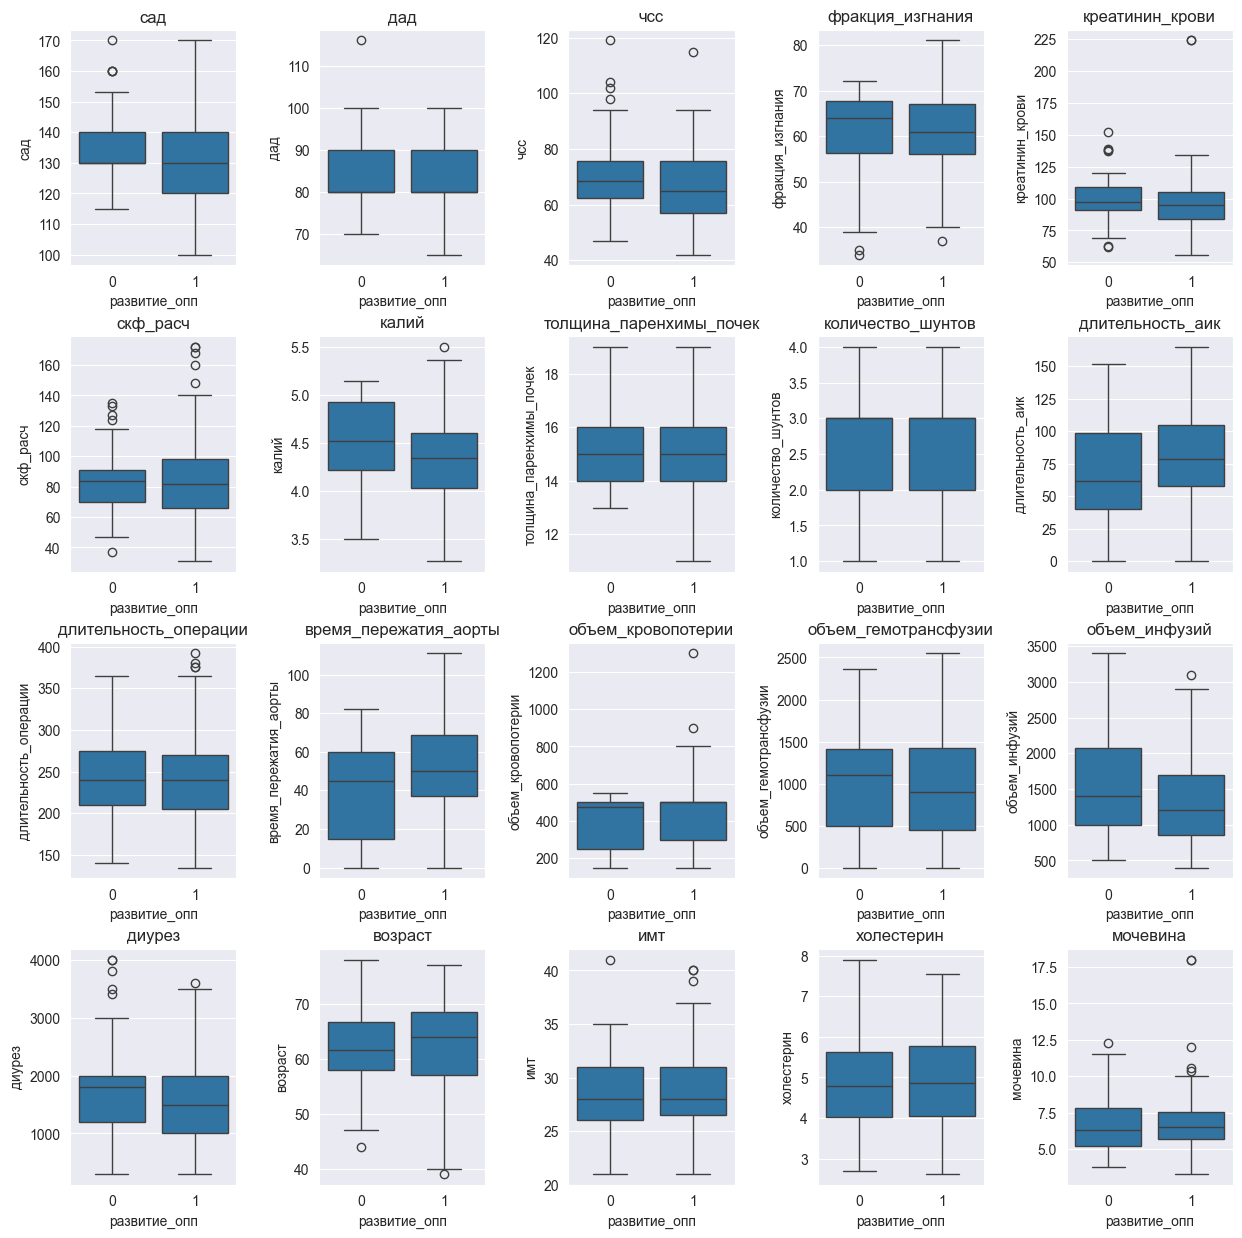

In [5]:
viz_data_box_multiple(data, ["сад", "дад", "чсс", "фракция_изгнания",
                             "креатинин_крови", "скф_расч", "калий", "толщина_паренхимы_почек",
                             "количество_шунтов", "длительность_аик", "длительность_операции", "время_пережатия_аорты",
                             "объем_кровопотерии", "объем_гемотрансфузии", "объем_инфузий", "диурез", "возраст", "имт",
                             "холестерин", "мочевина"], 'развитие_опп')

Подтвержденные связи факторов:

P-value: 0.0327
Отвергаем нулевую гипотезу, различия между группами существуют в чсс.

P-value: 0.022
Отвергаем нулевую гипотезу, различия между группами существуют в калий.

P-value: 0.025
Отвергаем нулевую гипотезу, различия между группами существуют в объем_кровопотерии.

P-value: 0.0193
Отвергаем нулевую гипотезу, различия между группами существуют в объем_инфузий.
